# 7-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자

## Step1. 사진 모으기
**1. 내 사진 찍기**  

내 사진을 2장 이상 포함   
내 사진들끼리의 얼굴 임베딩 벡터 거리를 구하기. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있다.   
혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해 보기

**2. 비교할 연예인 사진 모으기**  

많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아진다.  
주위의 동료들과 모은 사진을 주고받는 것도 하나의 방법

## Step2. 얼굴 영역 자르기

In [3]:
import face_recognition
import os
import numpy as np

In [4]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    return cropped_face

In [5]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
pillow_dir_path = os.getenv('HOME')+'/aiffel/face_embedding/pillow_image'

In [6]:
# PIL Image로 변환한 뒤에 저장
from PIL import Image

def save_pillow_image(dir_path, pillow_dir_path):
    file_list = os.listdir(dir_path)
    for file in file_list:
        image_file = os.path.join(dir_path, file)
        face = get_gropped_face(image_file)
        pillow_image = Image.fromarray(face)
        pillow_image_file = os.path.join(pillow_dir_path, file)
        pillow_image.save(pillow_image_file)
    

In [7]:
save_pillow_image(dir_path,pillow_dir_path)

## Step3. 얼굴 영역의 임베딩 추출하기

In [9]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [10]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        image_file = os.path.join(dir_path, file)
        face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)
        
        # 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
        embedding = get_face_embedding(face)

        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [11]:
embedding_dict = get_face_embedding_dict(dir_path)

## Step4. 모은 연예인들과 비교하기

In [13]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [14]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [16]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    return sorted_faces

In [17]:
sorted_faces = get_nearest_face('주진경')

순위 1 : 이름(주진경2), 거리(0.37633864889731816)
순위 2 : 이름(선우용녀), 거리(0.4486849811689841)
순위 3 : 이름(강소라), 거리(0.5104390055175815)
순위 4 : 이름(김서형), 거리(0.5300826840684173)
순위 5 : 이름(신세경), 거리(0.5434294527179644)


## Step5. 다양한 재미있는 시각화 시도해 보기

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
def get_nearest_face_image(dir_path, nearest_face_name):
    file_list = os.listdir(dir_path) 
    image = []
    for file in file_list:
        if os.path.splitext(file)[0] == nearest_face_name: 
            image.append(face_recognition.load_image_file(os.path.join(dir_path, file)))
            image.append(os.path.join(dir_path, file))
            break
    return image

In [19]:
my_picture = get_nearest_face_image(pillow_dir_path, sorted_faces[0][0]) #입력한 내 사진
my_picture2 = get_nearest_face_image(pillow_dir_path, sorted_faces[1][0]) #입력한 내 사진과 가장 거리가 가까이 나온 것은 다른 내 사진
artist = get_nearest_face_image(pillow_dir_path, sorted_faces[2][0]) #입력한 내 사진과 가장 비슷한 연예인

(-0.5, 88.5, 89.5, -0.5)

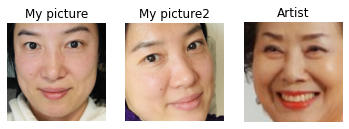

In [40]:
plt.subplot(1,3,1)
plt.imshow(my_picture[0])
plt.title('My picture')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(my_picture2[0])
plt.title('My picture2')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(artist[0])
plt.title('Artist')
plt.axis('off')

In [21]:
my_picture[1]

'/home/ssac6/aiffel/face_embedding/pillow_image/주진경.jpg'

**결국..**

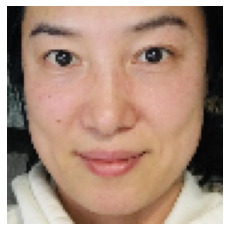

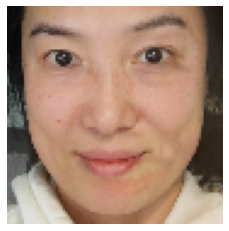

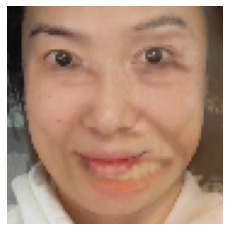

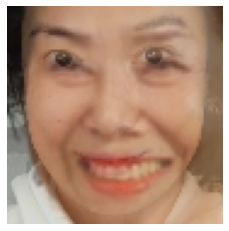

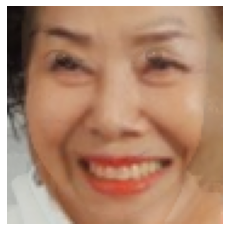

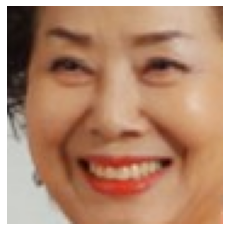

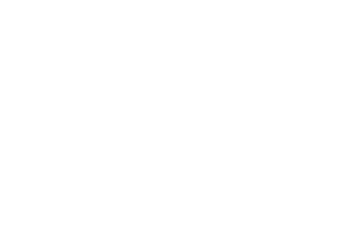

In [39]:
import cv2 as cv

a = 0.0

img1 = cv.imread(artist[1])
img2 = cv.imread(my_picture[1])

width = img1.shape[1]
height = img1.shape[0]
img2 = cv.resize(img2,(width,height))
plt.axis('off')

#plt.subplot(1,6,1)
while a <= 1.0:    
    b = 1.0 - a
    dst = cv.addWeighted(img1,a,img2,b,0)
    img_rgb = cv.cvtColor(dst, cv.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
    plt.axis('off')
    a = a + 0.2

## 느낀점